We are building an end to end multi class image classifier using TensorFlow and TensorFlow Hub.

## 1. Problem Definition

Identifying the breed of a dog given an image of a dog.

## 2. Data

We are using "Dog Breed Identification" dataset from Kaggle: https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

For evaluating we will have to submit a file with prediction probabilities for each of the different dog breeds of each test image.

The file should contain a header and have the following format:

<code>id,affenpinscher,afghan_hound,..,yorkshire_terrier
000621fb3cbb32d8935728e48679680e,0.0083,0.0,...,0.0083
etc.</code>

Details: https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

- We are dealing with unstructured data (images) which means no tabular formed data. So it's best to use Deep Learning / Transfer Learning.
- There are 120 breeds of dogs which means we 120 classes
- There are around 10,000+ images in the training dataset and they are **labeled**
- There are around 10,000+ images in the test dataset but they don't have any labels as it is up to us to predict the labels

---

## Getting the Workspace Ready

- Import TensorFlow ✅
- Import TensorFlowHub ✅
- Connect to GPU ✅

In [1]:
# Import necessary modules
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
# Check versions
print("TensorFlow Version: ", tf.__version__)
print("TensorFlow Hub Version: ", hub.__version__)

TensorFlow Version:  2.5.0
TensorFlow Hub Version:  0.12.0


In [3]:
# Check GPU status
print("GPU", "Available! 😃😀" if tf.config.list_physical_devices("GPU") else "Not Available 😟")

GPU Available! 😃😀


## Getting Our Data Ready

In every machine learning model, our data must be first converted to numerical format. So we have to turn our images into that form too.

Here, we are turning the images into tensors (numerical representation)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # style theme of plots

In [5]:
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/Dataset/labels.csv")

labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,51cf930fcaa72551347eaed4b2e08f1b,scottish_deerhound
freq,1,126


In [6]:
len(labels_csv)

10222

In [7]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [8]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
golden_retriever         67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

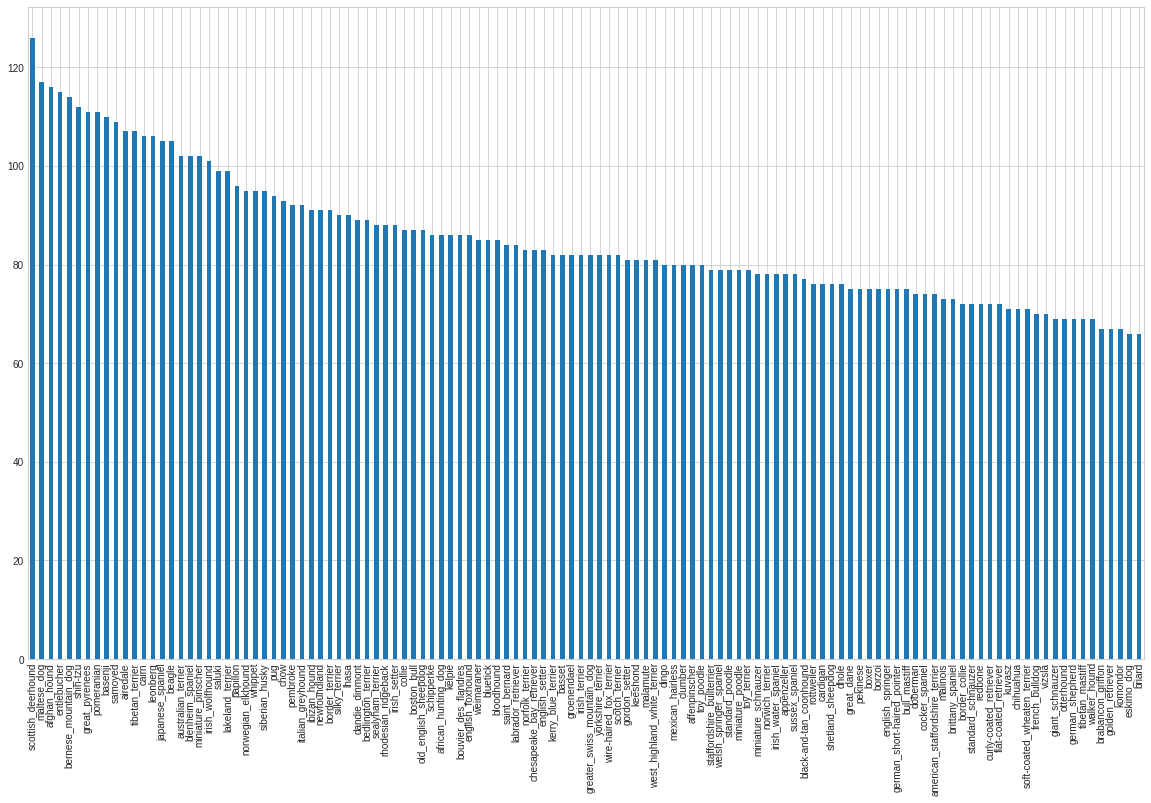

In [9]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,12));

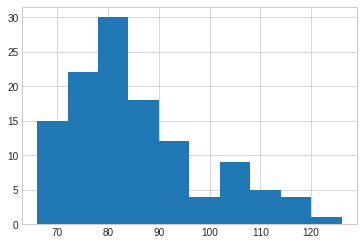

In [10]:
labels_csv["breed"].value_counts().hist();

In [11]:
labels_csv["breed"].value_counts().median()

82.0

In [12]:
# Create pathnames for image ID's
filenames = []

for fname in labels_csv["id"]:
  filenames.append("/content/drive/MyDrive/Dog Vision/Dataset/train/"+fname+".jpg")

filenames[:5]

['/content/drive/MyDrive/Dog Vision/Dataset/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Vision/Dataset/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Vision/Dataset/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Vision/Dataset/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Vision/Dataset/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [13]:
len(filenames)

10222

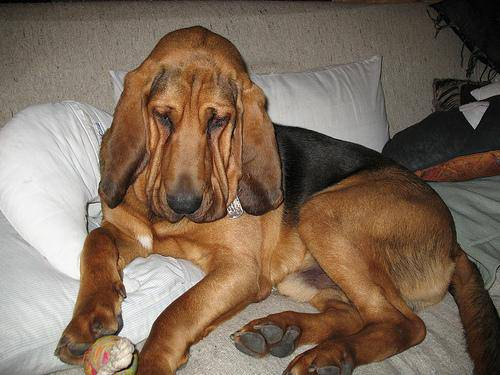

In [14]:
# Module to display images
from IPython.display import Image

Image(filenames[69])

In [15]:
print(f"Breed name of the above image is: " + labels_csv["breed"][69])

Breed name of the above image is: bloodhound


## Turn Data into Number

In [16]:
labels = labels_csv["breed"].to_numpy()

labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [17]:
len(labels)

10222

In [18]:
unique_breeds = np.unique(labels)

len(unique_breeds)

120

**Turn every label into boolean array**

In [19]:
boolean_labels = [label == unique_breeds for label in labels]

boolean_labels[69]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
len(boolean_labels)

10222

In [21]:
print(labels[69])
print(boolean_labels[69].astype(int))

bloodhound
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating Our Validation Set

We are going to start off experimenting with ~1000 images and increase as needed.

In [22]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000}

In [23]:
# Setup X/y
X = filenames
y = boolean_labels

In [24]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

In [25]:
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

## Proprocess Images (Turning Images into Tensors)

To preprocess our images we are going to write a function that's going to do few things:
1. Take a image filepath as input
2. Use TensorFlow to read the image and save it to a variable let's say `image`
3. Turn `image` into tensors
4. Normalize our image (convert color channels value from 0-255 to 0-1)
5. Resize the `image` to shape (224, 224)
6. Return the modified `image`


In [26]:
IMG_SIZE = 224

In [27]:
def process_image(image_path, img_size=IMG_SIZE):
  # Read an image file
  image = tf.io.read_file(image_path)

  # Turn the image (jpeg) into Tensors with 3 color channels
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the color channels value from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image
  image = tf.image.resize(image, size=[img_size, img_size])

  return image

## Turning Our Data into Batches

Why we need to turn our data into batches?

If we want to process let's say 10,000+ images in one go, this might not even fit in the memory.

So, we choose 32 images as the batch size to process them at a time. The batch size can be adjusted manually. But Yann LeCun recommends the batch size to be 32 at max.

To use TensorFlow effectively we need our data to be in the form of Tensor tuples which looks like: `(image, label)`

In [28]:
# Create Tensor tuples
def get_image_label(image_path, label):
  image = process_image(image_path)

  return image, label

In [29]:
BATCH_SIZE = 32

In [30]:
# Create data batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
    1. Creates batches of data out of image (X) and label (y) pair
    2. Shuffles the data if its training data but doesn't shuffle if its validation data
    3. Also accepts test data as input (no labels, y=None)
  """

  # If the dataset is for test data, we generally don't have any labels attached to that
  if test_data:
    print("Creating test data batches ...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(batch_size)

    return data_batch

  # If the dataset is validation set, we don't need to shuffle that
  elif valid_data:
    print("Creating validation data batches ...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(batch_size)

    return data_batch

  # If the dataset is training set
  else:
    print("Creating training data batches ...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))

    # Shuffling data
    data = data.shuffle(buffer_size=len(X))

    # Create batch
    data_batch = data.map(get_image_label).batch(batch_size)

  return data_batch

In [31]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
validation_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches ...
Creating validation data batches ...


In [32]:
# Check attributes of data batches
train_data.element_spec, validation_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualize Data Batch

In [33]:
def show_25_images(images, labels):
  # Setup the figure size
  plt.figure(figsize=(15, 15))

  for i in range(25):
    # Create subplots having 5 rows and 5 columns
    ax = plt.subplot(5, 5, i+1)

    # Display the image
    plt.imshow(images[i])

    # Label of the image
    plt.title(unique_breeds[labels[i].argmax()])

    plt.axis("off")

In [34]:
# As the train_data is in batch form, we need to turn it into iterator
train_images, train_labels = next(train_data.as_numpy_iterator())

In [35]:
len(train_images), len(train_labels)

(32, 32)

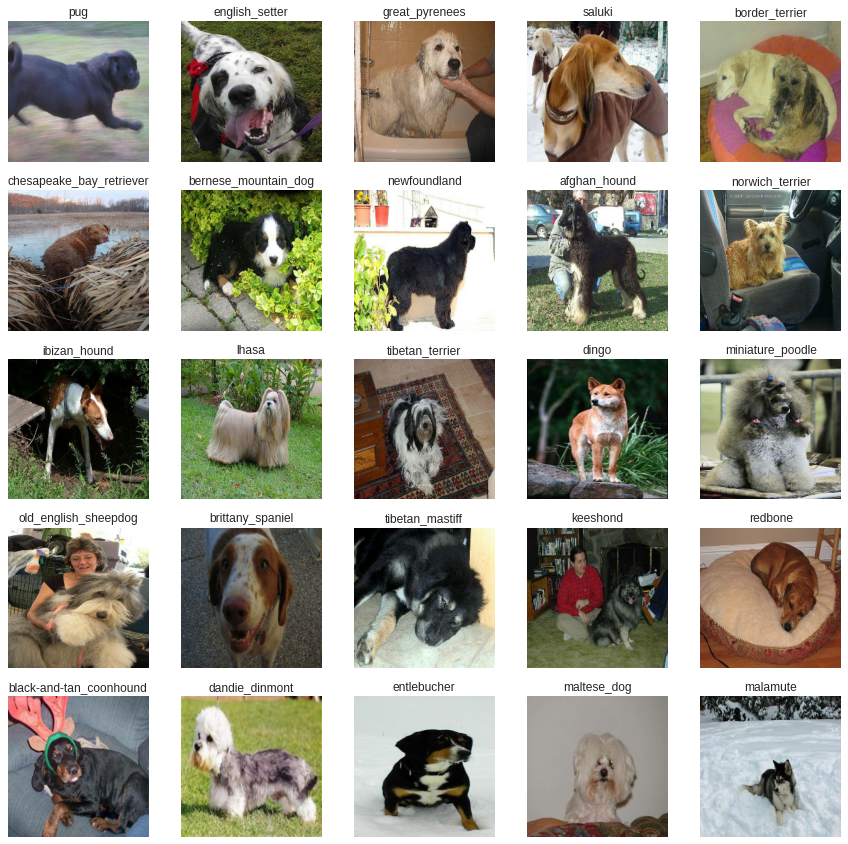

In [36]:
show_25_images(train_images, train_labels)

In [37]:
val_images, val_labels = next(validation_data.as_numpy_iterator())

In [38]:
len(val_images), len(val_labels)

(32, 32)

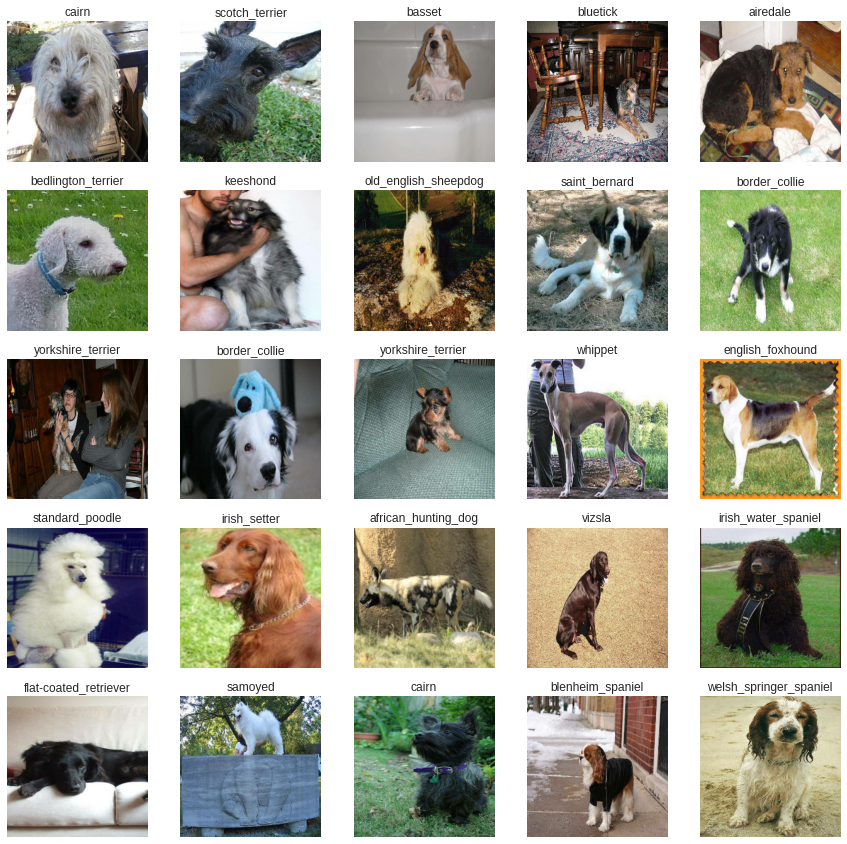

In [39]:
show_25_images(val_images, val_labels)

---

## Building a Model

We need to define few things before building a model:
- The input shape (image shape in the form of Tensor) to our model
- The output shape (image labels in the form of Tensor) of our model
- The URL of the model we want to use

In [40]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch, height, width, color channels

OUTPUT_SHAPE = len(unique_breeds)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

**Let's put them together into a Keras Deep Learning Model**

Let's create a function that:
* Takes the input shape, output shape and model as parameters
* Defines the layers in Keras model in sequential fashion (do this first, then this, then that...)
* Compiles the model (how it should be evaluated and improved)
* Builds the model
* Returns the model

In [41]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Creating and Building model...")

  # Setup the model
  model = tf.keras.Sequential([
                               hub.KerasLayer(MODEL_URL), # layer-1 (input layer)
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax") # layer-2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy,
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  # Return the model
  return model

In [42]:
model = create_model()

Creating and Building model...


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Callbacks

Callbacks are helper functions that a model can use during training to do such things as check its progress, save its progress or stop training early if the model stops improving.

We'll create 2 helper functions for:
1. TensorBoard which helps track models' progress
2. Stopping early to prevent model running for too long

### 1. TensorBoard Callback

* Load the TensorBoard extension
* Create a callback which is able to save logs to a directory and pass it to the model's `fit()` function
* Visualize model's training logs using `%tensorboard` magic function

In [44]:
# Load TensorBoard extension
%load_ext tensorboard

In [45]:
import datetime
import os

# TensorBoard Callback
def create_tensorboard_callback():
  # Create a log directory for storing tensorboard logs
  logdir = os.path.join("/content/drive/MyDrive/Dog Vision/Logs", datetime.datetime.now().strftime("%d%m%Y-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

Early Stopping

In case a certain evaluation metric stops, early stopping helps stop the model from overfitting by stopping training.

Overfitting is a modeling error in statistics that occurs when a function is too closely aligned to a limited set of data points. <u>**Overfitting refers to a model that models the training data too well**</u>. 

As a result, the model is useful in reference only to its initial data set, and not to any other data sets. <u>**Overfitting is bad because**</u>: The model has extra capacity to learn the random noise in the observation. To accommodate noise, an overfit model overstretches itself and ignores domains not covered by data. Consequently, the model makes poor predictions everywhere other than near the training set.

In [46]:
# EarlyStopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

## Training A Model

To make sure everything is working, our first model is only going to train on 1000 images.

In [47]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [48]:
def train_model():
  """
    Train a model and return the trained version
  """
  # Create a model
  model = create_model()

  # Create a new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model
  model.fit(x=train_data, epochs=NUM_EPOCHS, validation_data=val_data, validation_freq=1, callbacks=[tensorboard, early_stopping])

  return model